# CAP4910 | Capstone | Project 2 | Carlos Diaz

# Survival Years of Patients with Diffuse Large B-Cell Lymphoma

---

## Objective
### In this project we will improve the machine learning models using Grid Search by finding "the optimal combination of hyperparameter values", to predict the survival rates of patients with difuse Large B_Cell Lymphoma.

Selected the data of patients with Diffuse Large B-Cell Lymphoma, which is the most frequent type of lymphoma. “Lymphoma is a group of blood cancers that develop from lymphocytes...Signs and symptoms include enlarged lymph nodes, fever, drenching sweats, unintended weight loss, itching and constantly feeling tired”. The data comes from cBioPortal for Cancer Genomics (Duke, Cell 2017) https://www.cbioportal.org/. 

https://www.cbioportal.org/about

Changed the name of data for lymphoma data and selected the following columns to start working:
- Patient Identifier 
- Sex: Male or Female
- Age at Diagnosis
- Initial Treatment Response: Partial response, No response, Complete response.
- B Symptoms at Diagnosis: Yes, No. (fever, night sweats, and weight loss).
- Testicular Involvement: Yes, No, Female.
- CNS Status: Yes, No. (Central Nervous System)
- CNS Relapse: Yes, No.
- Overall Survival Months.
- IPI: International Prognostic Index, score to assets severity of the lymphoma. The IPI includes: Age, Ann Arbor stage III-IV, ECOG performance status and LDH Factor.
- ECOG IPI Score: Easter Cooperative Oncology Group, performance scale for functional status. ECOG performance status >= 2 , No =0, Yes = 1. 

ECOG describes a patient’s level of functioning in terms of their ability to care for themselves, daily activity, and physical ability.

| ECOG Scale | ECOG Description                                                                                                                                          |
|------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0          | Fully active, able to carry on all pre-disease performance without restriction                                                                            |
| 1          | Restricted in physically strenuous activity but ambulatory and able to carry out work of a light or sedentary nature, e.g., light house work, office work |
| 2          | Ambulatory and capable of all self-care but unable to carry out any work activities. Up and about more than 50% of waking hours                           |
| 3          | Capable of only limited self-care, confined to bed or chair more than 50% of waking hours                                                                 |
| 4          | Completely disabled. Cannot carry on any self-care. Totally confined to bed or chair.                                                                     |
| 5          | Dead                                                                                                                                                      |

Deleted the IPI factor because it contains the sum of all of the IPIs.
- BCL2 Fish Status: Method to detect abnormal protein BCL2.
- MYC Fish Status: Method to detect abnormal protein MYC.
- BCL6 Fish Status: Method to detect abnormal protein BCL6.

NOTE: I deleted these three columns: BCL2, MYC, BCL6 because they have more than 88% of Nan.

I also deleted the Patient Identifier

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [72]:
lymphoma_data = pd.read_csv('data_clinical_patient.csv')

In [73]:
lymphoma_data.corr()

,Age.at.Diagnosis,Overall.Survival..Months.,IPI,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor
Age.at.Diagnosis,1.000000,-0.155393,0.301629,0.084681,0.046568,-0.017454,-0.058878,0.796415
Overall.Survival..Months.,-0.155393,1.000000,-0.205942,-0.228438,-0.114112,-0.062434,-0.092488,-0.145093
IPI,0.301629,-0.205942,1.000000,0.604818,0.685328,0.614271,0.563755,0.403872
ECOG.IPI.Score,0.084681,-0.228438,0.604818,1.000000,0.209956,0.273996,0.174138,0.102027
AnnArbor.Stage.IPI,0.046568,-0.114112,0.685328,0.209956,1.000000,0.313720,0.361192,0.063791
LDH.IPI.Factor,-0.017454,-0.062434,0.614271,0.273996,0.313720,1.000000,0.183865,-0.033149
Extranodal.IPI.Factor,-0.058878,-0.092488,0.563755,0.174138,0.361192,0.183865,1.000000,-0.019622
Age.IPI.Factor,0.796415,-0.145093,0.403872,0.102027,0.063791,-0.033149,-0.019622,1.000000


In [74]:
for col in lymphoma_data.columns:
    print(col, end=' | ')

X.Patient.Identifier | Sex | Age.at.Diagnosis | Initial.Treatment.Response | B.Symptoms.at.Diagnosis | Testicular.Involvement | CNS.Status | CNS.Relapse | Overall.Survival..Months. | IPI | ECOG.IPI.Score | AnnArbor.Stage.IPI | LDH.IPI.Factor | Extranodal.IPI.Factor | Age.IPI.Factor | BCL2.Fish.Status | MYC.Fish.Status | BCL6.Fish.Status | Cancer.Type.Detailed | 

In [75]:
lymphoma_data.head()

,X.Patient.Identifier,Sex,Age.at.Diagnosis,Initial.Treatment.Response,B.Symptoms.at.Diagnosis,Testicular.Involvement,CNS.Status,CNS.Relapse,Overall.Survival..Months.,IPI,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor,BCL2.Fish.Status,MYC.Fish.Status,BCL6.Fish.Status,Cancer.Type.Detailed
0,DLBCL_DUKE_1008,Male,74.7,Complete response,Yes,No,No,No,13.376,3.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS"
1,DLBCL_DUKE_1016,Female,87.8,Partial response,No,Female,No,No,142.880,3.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS"
2,DLBCL_DUKE_2043,Female,76.6,Complete response,NaN,Female,No,NaN,279.376,3.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS"
3,DLBCL_DUKE_2044,Female,70.9,Partial response,NaN,Female,No,NaN,181.184,2.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS"
4,DLBCL_DUKE_2045,Male,71.5,No response,NaN,NaN,NaN,NaN,24.320,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS"


In [76]:
cols = lymphoma_data.columns.tolist()
cols_order = cols[:8] + cols[9:] + [cols[8]]
cols_order
lymphoma_data = lymphoma_data[cols_order]
lymphoma_data.head()

,X.Patient.Identifier,Sex,Age.at.Diagnosis,Initial.Treatment.Response,B.Symptoms.at.Diagnosis,Testicular.Involvement,CNS.Status,CNS.Relapse,IPI,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor,BCL2.Fish.Status,MYC.Fish.Status,BCL6.Fish.Status,Cancer.Type.Detailed,Overall.Survival..Months.
0,DLBCL_DUKE_1008,Male,74.7,Complete response,Yes,No,No,No,3.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS",13.376
1,DLBCL_DUKE_1016,Female,87.8,Partial response,No,Female,No,No,3.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS",142.880
2,DLBCL_DUKE_2043,Female,76.6,Complete response,NaN,Female,No,NaN,3.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS",279.376
3,DLBCL_DUKE_2044,Female,70.9,Partial response,NaN,Female,No,NaN,2.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS",181.184
4,DLBCL_DUKE_2045,Male,71.5,No response,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,"Diffuse Large B-Cell Lymphoma, NOS",24.320


## Part I Data Transformation

In [77]:
def cleanning_house():
    lymphoma_data.loc[:5, "X.Patient.Identifier"]
    lymphoma_data["X.Patient.Identifier"].nunique()
    lymphoma_data['Sex'].value_counts(normalize=True) * 100
    lymphoma_data['Sex'].isna().value_counts()
    lymphoma_data['Sex'].fillna(method='bfill', inplace=True)
    lymphoma_data.loc[:5, 'Age.at.Diagnosis']
    median_age = lymphoma_data['Age.at.Diagnosis'].median()
    lymphoma_data['Age.at.Diagnosis'].fillna(median_age, inplace=True)
    lymphoma_data['Age.at.Diagnosis'].isna().sum()
    lymphoma_data['Initial.Treatment.Response'].nunique()
    lymphoma_data['Initial.Treatment.Response'].isna().sum()
    lymphoma_data['B.Symptoms.at.Diagnosis'].value_counts(normalize=True) * 100
    lymphoma_data['Testicular.Involvement'].value_counts(normalize=True) * 100
    lymphoma_data['CNS.Status'].value_counts(normalize=True) * 100
    lymphoma_data['CNS.Relapse'].value_counts(normalize=True) * 100
    lymphoma_data['Testicular.Involvement'].value_counts(normalize=True) * 100
    

In [78]:
cleanning_house()

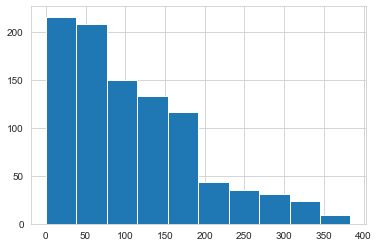

In [79]:
lymphoma_data['Overall.Survival..Months.'].hist()
plt.show()

In [80]:
lymphoma_test_df = lymphoma_data[pd.isna(lymphoma_data['Overall.Survival..Months.'])]

In [81]:
lymphoma_data = lymphoma_data[lymphoma_data['Overall.Survival..Months.'].notna()]


In [82]:
lymphoma_data.shape

(967, 19)

In [83]:
lymphoma_data.columns

Index(['X.Patient.Identifier', 'Sex', 'Age.at.Diagnosis',
       'Initial.Treatment.Response', 'B.Symptoms.at.Diagnosis',
       'Testicular.Involvement', 'CNS.Status', 'CNS.Relapse', 'IPI',
       'ECOG.IPI.Score', 'AnnArbor.Stage.IPI', 'LDH.IPI.Factor',
       'Extranodal.IPI.Factor', 'Age.IPI.Factor', 'BCL2.Fish.Status',
       'MYC.Fish.Status', 'BCL6.Fish.Status', 'Cancer.Type.Detailed',
       'Overall.Survival..Months.'],
      dtype='object')

In [84]:
def cleanning_house2():
    lymphoma_data['IPI'].value_counts(normalize=True) * 100
    lymphoma_data['ECOG.IPI.Score'].value_counts(normalize=True) * 100
    lymphoma_data['AnnArbor.Stage.IPI'].value_counts(normalize=True) * 100
    lymphoma_data['LDH.IPI.Factor'].value_counts(normalize=True) * 100
    lymphoma_data['Extranodal.IPI.Factor'].value_counts(normalize=True) * 100
    lymphoma_data['Age.IPI.Factor'].value_counts(normalize=True) * 100
    lymphoma_data['BCL2.Fish.Status'].value_counts(normalize=True) * 100
    lymphoma_data['MYC.Fish.Status'].value_counts(normalize=True) * 100
    lymphoma_data['BCL6.Fish.Status'].value_counts(normalize=True) * 100
    lymphoma_data['Cancer.Type.Detailed'].value_counts(normalize=True) * 100
    
    

In [85]:
cleanning_house2()

## Threshold to Drop Column

In [86]:
for category in lymphoma_data.columns:
    na_count = lymphoma_data[category].isna().sum()
    tot_count = lymphoma_data[category].shape[0]
    prcnt = (na_count / tot_count ) * 100
    print(f'{category}: {prcnt:.2f}%')

X.Patient.Identifier: 0.00%
Sex: 0.00%
Age.at.Diagnosis: 0.00%
Initial.Treatment.Response: 6.83%
B.Symptoms.at.Diagnosis: 5.89%
Testicular.Involvement: 10.96%
CNS.Status: 11.17%
CNS.Relapse: 59.05%
IPI: 21.82%
ECOG.IPI.Score: 7.65%
AnnArbor.Stage.IPI: 1.76%
LDH.IPI.Factor: 10.13%
Extranodal.IPI.Factor: 8.07%
Age.IPI.Factor: 3.31%
BCL2.Fish.Status: 88.42%
MYC.Fish.Status: 88.42%
BCL6.Fish.Status: 88.42%
Cancer.Type.Detailed: 0.00%
Overall.Survival..Months.: 0.00%


## Converting From Months to Years

In [87]:
lymphoma_data['survival_years'] = lymphoma_data['Overall.Survival..Months.'] / 12

## Dropping and Transforming the Data

In [88]:
# Dropping the Patient Identifier
lymphoma_data = lymphoma_data.drop(['X.Patient.Identifier'], axis = 1)

In [89]:
lymphoma_data.columns

Index(['Sex', 'Age.at.Diagnosis', 'Initial.Treatment.Response',
       'B.Symptoms.at.Diagnosis', 'Testicular.Involvement', 'CNS.Status',
       'CNS.Relapse', 'IPI', 'ECOG.IPI.Score', 'AnnArbor.Stage.IPI',
       'LDH.IPI.Factor', 'Extranodal.IPI.Factor', 'Age.IPI.Factor',
       'BCL2.Fish.Status', 'MYC.Fish.Status', 'BCL6.Fish.Status',
       'Cancer.Type.Detailed', 'Overall.Survival..Months.', 'survival_years'],
      dtype='object')

In [90]:
# Trransforming the Sex Column
dummy_sex = pd.get_dummies(lymphoma_data.iloc[:, 0], prefix='Sex', prefix_sep='.', drop_first=True)
dummy_initial_tr = pd.get_dummies(lymphoma_data.iloc[:, 2], prefix='Initial.Treatment.Response', prefix_sep='.', drop_first=True)
dummy_symptoms = pd.get_dummies(lymphoma_data.iloc[:, 3], prefix='B.Symptoms.at.Diagnosis', prefix_sep='.', drop_first=True)
dummy_test_inv = pd.get_dummies(lymphoma_data.iloc[:, 4], prefix='Testicular.Involvement', prefix_sep='.', drop_first=True)
dummy_cns_stat = pd.get_dummies(lymphoma_data.iloc[:, 5], prefix='CNS.Status', prefix_sep='.', drop_first=True)
dummy_cns_rlps= pd.get_dummies(lymphoma_data.iloc[:, 5], prefix='CNS.Relapse', prefix_sep='.', drop_first=True)

In [91]:
lymphoma_data.drop(['Sex', 'Initial.Treatment.Response', 'B.Symptoms.at.Diagnosis', 'Testicular.Involvement', 
                    'CNS.Status','CNS.Relapse', ], axis=1, inplace=True)

In [92]:
# We create the new DataFrame with the Binary Indicators for the categories using concatenate.
lymphoma_data = pd.concat([dummy_sex, dummy_initial_tr, dummy_symptoms, dummy_test_inv, dummy_cns_stat, 
                           dummy_cns_rlps, lymphoma_data], axis=1)

In [93]:
lymphoma_data.drop(['Cancer.Type.Detailed'], axis=1, inplace=True)
lymphoma_data.head()

,Sex.Male,Initial.Treatment.Response.No response,Initial.Treatment.Response.Partial response,B.Symptoms.at.Diagnosis.Yes,Testicular.Involvement.No,Testicular.Involvement.Yes,CNS.Status.Yes,CNS.Relapse.Yes,Age.at.Diagnosis,IPI,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor,BCL2.Fish.Status,MYC.Fish.Status,BCL6.Fish.Status,Overall.Survival..Months.,survival_years
0,1,0,0,1,1,0,0,0,74.7,3.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,13.376,1.114667
1,0,0,1,0,0,0,0,0,87.8,3.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,142.880,11.906667
2,0,0,0,0,0,0,0,0,76.6,3.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,279.376,23.281333
3,0,0,1,0,0,0,0,0,70.9,2.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,181.184,15.098667
4,1,1,0,0,0,0,0,0,71.5,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,24.320,2.026667


In [94]:
lymphoma_data.drop(['IPI'], axis=1, inplace=True)
lymphoma_data.head()

,Sex.Male,Initial.Treatment.Response.No response,Initial.Treatment.Response.Partial response,B.Symptoms.at.Diagnosis.Yes,Testicular.Involvement.No,Testicular.Involvement.Yes,CNS.Status.Yes,CNS.Relapse.Yes,Age.at.Diagnosis,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor,BCL2.Fish.Status,MYC.Fish.Status,BCL6.Fish.Status,Overall.Survival..Months.,survival_years
0,1,0,0,1,1,0,0,0,74.7,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,13.376,1.114667
1,0,0,1,0,0,0,0,0,87.8,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,142.880,11.906667
2,0,0,0,0,0,0,0,0,76.6,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,279.376,23.281333
3,0,0,1,0,0,0,0,0,70.9,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,181.184,15.098667
4,1,1,0,0,0,0,0,0,71.5,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,24.320,2.026667


### Final dataset

In [95]:
lymphoma_data.drop(['BCL2.Fish.Status', 'MYC.Fish.Status', 'BCL6.Fish.Status'], axis=1, inplace=True)
lymphoma_data.head()

,Sex.Male,Initial.Treatment.Response.No response,Initial.Treatment.Response.Partial response,B.Symptoms.at.Diagnosis.Yes,Testicular.Involvement.No,Testicular.Involvement.Yes,CNS.Status.Yes,CNS.Relapse.Yes,Age.at.Diagnosis,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor,Overall.Survival..Months.,survival_years
0,1,0,0,1,1,0,0,0,74.7,0.0,1.0,1.0,0.0,1.0,13.376,1.114667
1,0,0,1,0,0,0,0,0,87.8,1.0,0.0,1.0,0.0,1.0,142.880,11.906667
2,0,0,0,0,0,0,0,0,76.6,0.0,1.0,1.0,0.0,1.0,279.376,23.281333
3,0,0,1,0,0,0,0,0,70.9,0.0,0.0,1.0,0.0,1.0,181.184,15.098667
4,1,1,0,0,0,0,0,0,71.5,1.0,1.0,NaN,NaN,1.0,24.320,2.026667


In [96]:
lymphoma_data.shape

(967, 16)

In [97]:
lymphoma_data.keys()

Index(['Sex.Male', 'Initial.Treatment.Response.No response',
       'Initial.Treatment.Response.Partial response',
       'B.Symptoms.at.Diagnosis.Yes', 'Testicular.Involvement.No',
       'Testicular.Involvement.Yes', 'CNS.Status.Yes', 'CNS.Relapse.Yes',
       'Age.at.Diagnosis', 'ECOG.IPI.Score', 'AnnArbor.Stage.IPI',
       'LDH.IPI.Factor', 'Extranodal.IPI.Factor', 'Age.IPI.Factor',
       'Overall.Survival..Months.', 'survival_years'],
      dtype='object')

## Model: Survival of 5 Years or More

In [98]:
def category_func_target(value):
    if value < 5:
        return 0
    else:
        return 1        

In [99]:
lymphoma_data['survival_years'].apply(lambda x: category_func_target(x))

0       0
1       1
2       1
3       1
4       0
       ..
996     1
997     0
998     0
999     1
1000    1
Name: survival_years, Length: 967, dtype: int64

In [100]:
lymphoma_data['target'] = lymphoma_data['survival_years'].apply(lambda x: category_func_target(x))

In [101]:
#lymphoma_data.count()

In [102]:
#lymphoma_data[lymphoma_data['survival_years'] >= 5].count()

### Part II Data Modeling

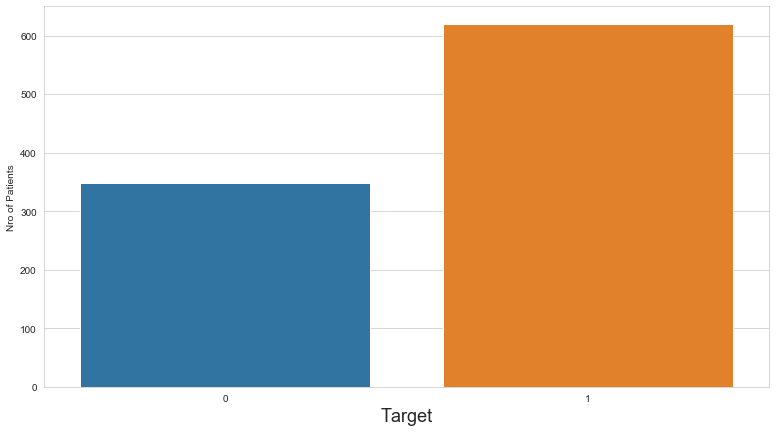

In [103]:
import seaborn as sns

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(lymphoma_data['target'],label='Count',ax=ax, data=lymphoma_data)
plt.xlabel('Target', fontsize=18)
plt.ylabel('Nro of Patients', fontsize=10)
plt.show()

In [104]:
lymphoma_data.columns[16]

'target'

In [105]:
lymphoma_data = lymphoma_data.fillna(value=0, method=None)

In [106]:
X= lymphoma_data[lymphoma_data.columns[:-1]]
y=lymphoma_data.target
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size= 0.5, random_state=42)

## Combining transformers and estimators in a pipeline

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.845


## K-fold cross-validation

In [108]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train, y_train)
    score = pipe_lr.score(X_train, y_train)
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train), score))

    print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  2, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  3, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  4, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  5, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  6, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  7, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  8, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold:  9, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000
Fold: 10, Class dist.: [171 312], Acc: 0.828

CV accuracy: 0.828 +/- 0.000


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.85714286 0.85714286 0.93877551 0.875      0.85416667 0.72916667
 0.91666667 0.77083333 0.85416667 0.72916667]


In [110]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.838 +/- 0.069


In [111]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### NEXT WE USE SUPPORT VECTOR CLASSIFICATION SVC TO TRAIN THE TRAINING DATASET.  WE IMPORT SVC AS THE MODEL AND APPLY FIT TO THE X_TRAIN AND Y_TRAIN.

In [112]:
# Fitting SVM to the training set
from sklearn.svm import SVC

In [113]:
model = SVC()

In [114]:
model.fit(X_train, y_train)

SVC()

### Confusion matrix

In [115]:
from sklearn import metrics
predictions = model.predict(X_test)

In [116]:
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[168   9]
 [ 19 288]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       177
           1       0.97      0.94      0.95       307

    accuracy                           0.94       484
   macro avg       0.93      0.94      0.94       484
weighted avg       0.94      0.94      0.94       484



#### TO GET THE ACCURACY OF THE MODEL A LITTLE BIT EASIER WE IMPORT ACCURACY SCORE AND WE OBTAIN EXCLUSIVELY THE ACCURACY OF THE MODEL.


In [117]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)

In [118]:
accuracy

0.9421487603305785

In [119]:
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [120]:
param_grid = {'C':[0.1,1,10,100,1000] , 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [121]:
# defind grid using param_grid
# Enter your code here.
grid = GridSearchCV(SVC(), param_grid, cv = 5, verbose = 3) 

#### NEXT WE USE THE GRID TO FIT THE TRAIN DATA.

In [122]:
# Enter your code here.
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.649, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.649, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.639, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.646, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.646, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.763, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.680, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.680, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.649, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.649, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.639, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

#### RECALCULATING THE CONFUSION MATRIX TO CHECK ACCURACY. WE OBTAIN 0.98 IMPROVING THE ACCURACY OBTAINED AT THE BEGINNING.


In [123]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(metrics.classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       177
           1       0.97      0.99      0.98       307

    accuracy                           0.98       484
   macro avg       0.98      0.97      0.98       484
weighted avg       0.98      0.98      0.98       484



In [124]:
accuracy = grid.best_score_
accuracy

0.9772121993127147

## Validation and  learning curves.

In [125]:
from sklearn.model_selection import learning_curve

In [126]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1,solver='lbfgs', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train,train_sizes=np.linspace(\
                                                        0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

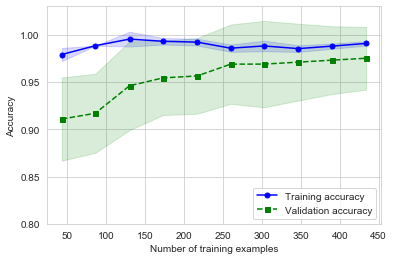

In [127]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

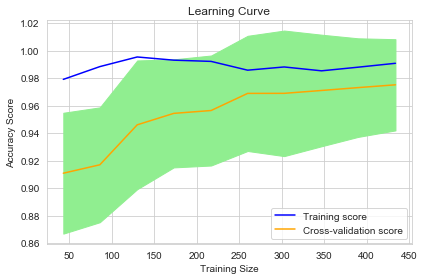

In [128]:
plt.plot(train_sizes, train_mean, color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange", label="Cross-validation score")

# Draw band
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="lightgreen")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Addressing overfitting with validation curves

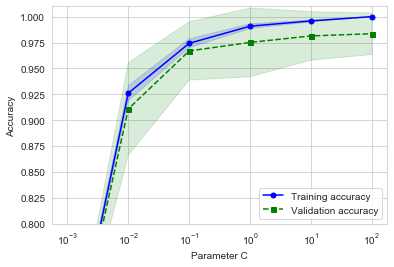

In [129]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C',\
                                                param_range=param_range,cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.01])
plt.show()

## ROC-AUC curve

In [130]:
from sklearn.decomposition import PCA

df_scaled_pca = PCA(n_components=2).fit_transform(df_scaled)
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=["PC1", "PC2"])

df_scaled_pca.head()

,PC1,PC2
0,2.187372,0.062265
1,0.038387,-2.348128
2,-2.261299,-1.394545
3,-1.138142,-1.910499
4,2.610555,-0.817366


In [131]:
lymphoma_data.head()

,Sex.Male,Initial.Treatment.Response.No response,Initial.Treatment.Response.Partial response,B.Symptoms.at.Diagnosis.Yes,Testicular.Involvement.No,Testicular.Involvement.Yes,CNS.Status.Yes,CNS.Relapse.Yes,Age.at.Diagnosis,ECOG.IPI.Score,AnnArbor.Stage.IPI,LDH.IPI.Factor,Extranodal.IPI.Factor,Age.IPI.Factor,Overall.Survival..Months.,survival_years,target
0,1,0,0,1,1,0,0,0,74.7,0.0,1.0,1.0,0.0,1.0,13.376,1.114667,0
1,0,0,1,0,0,0,0,0,87.8,1.0,0.0,1.0,0.0,1.0,142.880,11.906667,1
2,0,0,0,0,0,0,0,0,76.6,0.0,1.0,1.0,0.0,1.0,279.376,23.281333,1
3,0,0,1,0,0,0,0,0,70.9,0.0,0.0,1.0,0.0,1.0,181.184,15.098667,1
4,1,1,0,0,0,0,0,0,71.5,1.0,1.0,0.0,0.0,1.0,24.320,2.026667,0


In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(lymphoma_data)
df_scaled=pd.DataFrame(scaler.transform(lymphoma_data))

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.872573,-0.277196,-0.316408,1.370393,1.185526,-0.207726,-0.159533,-0.159533,0.917533,-0.572972,0.827447,0.998966,-0.523493,0.906141,-1.152845,-1.152845,-1.333692
1,-1.146035,-0.277196,3.160480,-0.729718,-0.843507,-0.207726,-0.159533,-0.159533,1.784554,1.745287,-1.208536,0.998966,-0.523493,0.906141,0.402783,0.402783,0.749798
2,-1.146035,-0.277196,-0.316408,-0.729718,-0.843507,-0.207726,-0.159533,-0.159533,1.043284,-0.572972,0.827447,0.998966,-0.523493,0.906141,2.042400,2.042400,0.749798
3,-1.146035,-0.277196,3.160480,-0.729718,-0.843507,-0.207726,-0.159533,-0.159533,0.666030,-0.572972,-1.208536,0.998966,-0.523493,0.906141,0.862898,0.862898,0.749798
4,0.872573,3.607560,-0.316408,-0.729718,-0.843507,-0.207726,-0.159533,-0.159533,0.705741,1.745287,0.827447,-1.001035,-0.523493,0.906141,-1.021383,-1.021383,-1.333692


In [133]:
from sklearn.decomposition import PCA

df_scaled_pca = PCA(n_components=2).fit_transform(df_scaled)
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=["PC1", "PC2"])

df_scaled_pca.head()

,PC1,PC2
0,2.187392,0.063237
1,0.038353,-2.350023
2,-2.261261,-1.392792
3,-1.138169,-1.911187
4,2.610564,-0.817404


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Function to train with opcion to choice a classifier and return the f1_score
def split_clf(X,y,classificator):
    if classificator=='NB':
        clf = BernoulliNB()
    elif classificator=='MLP':
        clf = MLPClassifier(activation='tanh', learning_rate_init=.001, random_state=0)
    elif classificator=='SVC':   
        clf = LinearSVC(random_state=0, tol=1e-5)
    elif classificator=='FOREST':
        clf = RandomForestClassifier(n_estimators=10,random_state=0)
    elif classificator=='LOGR':
        clf = LogisticRegression(solver='liblinear',random_state=0)
    else:
        return None
    
    X=X.values
    list_metrics=[]
    list_test_size=[]

    for n in np.linspace(0.1,0.9,9):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=0)
        clf.fit(X_train,y_train)    
        pred=clf.predict(X_test)
        list_metrics.append(f1_score(y_test,pred))
    return list_metrics

#Function to plot f1_score for all the classifiers
def plt_hold_out(d,y,txt_title):
    results=['NB','FOREST','LOGR']
    range_=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    lines=[7,5,3]

    for no_clus in range(len(results)):
        line=plt.plot(range_,split_clf(d,y,results[no_clus]),linewidth=lines[no_clus])
    plt.title(txt_title)
    plt.xlabel('Data test %')
    plt.ylabel('F1 score')
    plt.legend(results, loc=4)
    plt.show()

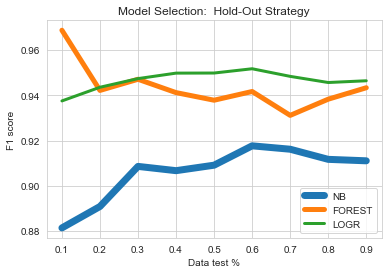

In [136]:
#Plot f1_score for each classifier
d=df_scaled_pca
plt_hold_out(d,y,'Model Selection:  Hold-Out Strategy')

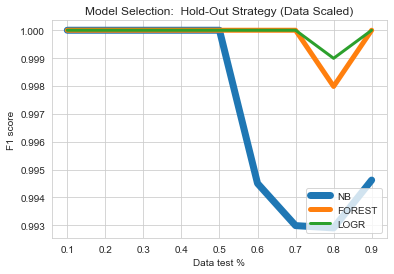

In [137]:
#Plot f1_score for each classifier with scaled data
d=df_scaled
plt_hold_out(d,y,'Model Selection:  Hold-Out Strategy (Data Scaled)')

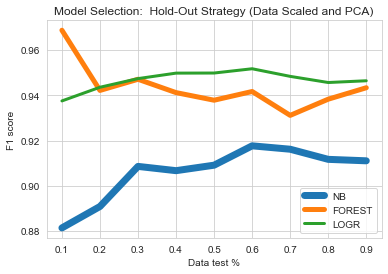

In [138]:
#Plot f1_score for each classifier with scaled data and reduction to dimensionality
d=df_scaled_pca
plt_hold_out(d,y,'Model Selection:  Hold-Out Strategy (Data Scaled and PCA)')

In [139]:
clf = BernoulliNB()
X_train, X_test, y_train, y_test = train_test_split(df_scaled_pca, y, test_size=0.35, random_state=0)
clf.fit(X_train,y_train)    
pred=clf.predict(X_test)
print('f1_score: ', f1_score(y_test,pred))

f1_score:  0.9086294416243654


In [140]:
num_positives=y_test.value_counts()[1]
num_negatives=y_test.value_counts()[0]
print('Examples positives: {} and Examples negatives: {}'.format(num_positives,num_negatives))

Examples positives: 214 and Examples negatives: 125


In [152]:
comp_results=pd.DataFrame(y_test)
comp_results['predictions']=pred
comp_results=comp_results.sort_values(by='target',ascending=False)

In [154]:
comp_results

,target,predictions
989,1,1
115,1,1
307,1,1
990,1,1
540,1,0
...,...,...
491,0,0
987,0,0
553,0,0
694,0,0


In [156]:
TP=(comp_results.query('target==predictions and target==1')).shape[0]
TN=(comp_results.query('target==predictions and target==0')).shape[0]
FP=(comp_results.query('target!=predictions and target==0')).shape[0]
FN=(comp_results.query('target!=predictions and target==1')).shape[0]
ACC=(TP+TN)/y_test.shape[0]
SEN=TP/num_positives
ESP=TN/num_negatives
PREC=TP/(TP+FP)
F1_SCORE= 2 * (PREC * SEN) / (PREC + SEN)
print('F1 SCORE: ',F1_SCORE) #we calculated the same value than sklearn

F1 SCORE:  0.9086294416243654


In [157]:
CONFUSION_MATRIX=pd.DataFrame([TP,FN], columns=['POSITIVE CLASS'])
CONFUSION_MATRIX['NEGATIVE CLASS']=[FP,TN]
new_index=['Prediction POS','Prediction NEG']
CONFUSION_MATRIX=CONFUSION_MATRIX.set_index([new_index])
print('Confusion Matrix calculated:')
CONFUSION_MATRIX

Confusion Matrix calculated:


,POSITIVE CLASS,NEGATIVE CLASS
Prediction POS,179,1
Prediction NEG,35,124


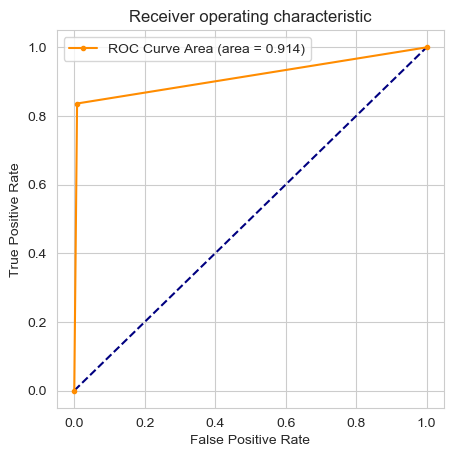

In [170]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(logistic_fpr, logistic_tpr, marker='.', color ="darkorange",label='ROC Curve Area (area = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend()

plt.show()